In [12]:
'''必要なライブラリをインポート'''
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from skimage import util

In [13]:
'''waveファイルから必要な情報を読み込む'''
rate, audio = wavfile.read(r"piano.wav", "r") # waveファイルを読み込み用ファイルとして開く

/tmp/ipykernel_1198/2210260420.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wavfile.read(r"piano.wav", "r") # waveファイルを読み込み用ファイルとして開く


In [14]:
N = audio.shape[0] # 要素数を返す
L = N/rate # 長さの算出

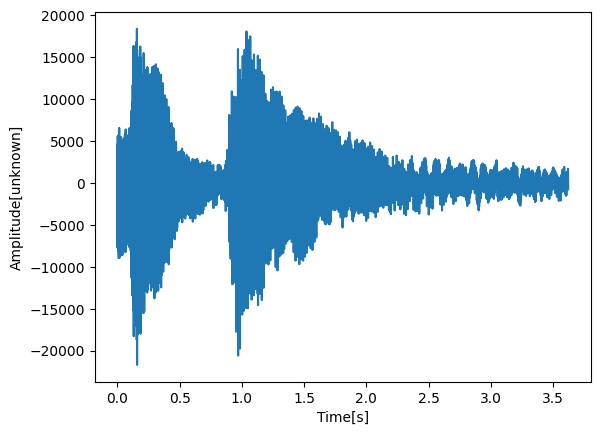

In [15]:
'''一旦グラフにプロット'''
f, ax = plt.subplots()
ax.plot(np.arange(N)/rate, audio)
ax.set_xlabel('Time[s]')
ax.set_ylabel('Amplitude[unknown]')
plt.show()

In [16]:
'''
1024(N)個のサンプル値で構成され、1つ前のスライスとサンプル100(step)個分ずれるようなスライスに分割する
'''
M = 1024 # スライスのサンプル数

slices = util.view_as_windows(audio, window_shape=(M,), step=100) # スライス分割

window = np.hamming(M+1)[:-1] # 窓関数の生成
slices = slices * window # スライスに窓を掛け合わせる

'''列ごとに1つのスライスがあるほうが便利なのでデータを転置する'''
slices = slices.T

spectrum = np.fft.fft(slices, axis=0)[:N] # スライスをフーリエ変換
spectrum = np.abs(spectrum) # スペクトラムの絶対値を取っている

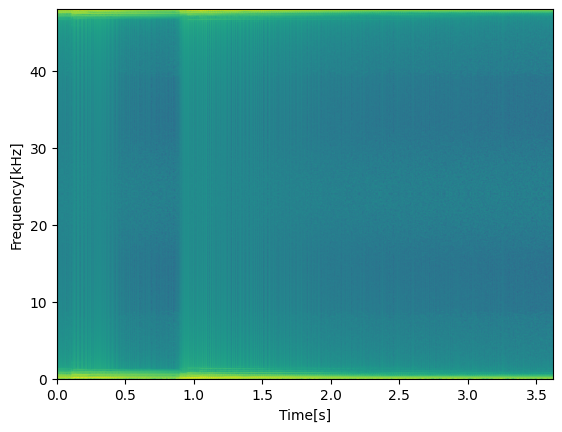

In [17]:
'''
スペクトルには、非常に大きい値と小さい値の両方が含まれるため、対数値を取って範囲を圧縮する
そしてグラフにプロットする
'''
f, ax = plt.subplots()

S = np.abs(spectrum) # スペクトラムの絶対値を取る
S = 20 * np.log10(S / np.max(S)) # スペクトラムの対数値を取る

ax.imshow(S, origin='lower', cmap='viridis', extent=(0, L, 0, rate/2/1000))
ax.axis('tight')
ax.set_ylabel('Frequency[kHz]')
ax.set_xlabel('Time[s]')

plt.show()